# HW 3：資料視覺化 - 91APP

## 小結

本周練習依時間分群（日期、月份、星期幾、小時），繪圖觀察總銷售量隨時間的消長，得知：

1.依日期分群：當日總銷售量在 **2017年11月11日** 出現異常極大值，推測或受「雙十一購物節」促銷影響。


2.依月份分群：當月總銷售量高峰出現在 **四、五及十一月** ，其中十一月的高銷售量極有可能是受 2017年11月11日 單日異常極高值影響。


3.依星期幾分群：總銷售量高峰出現在 **星期二、三及周末** 。周末購物潮好理解，但周間星期二、三卻出現銷售量高峰，本人不精準猜測和「週三小周末」有關，不少商家常以此作為促銷噱頭以衝高銷售量。


4.依小時幾分群：觀察折線圖和直方圖，發現總銷售量高峰出現在 **深夜時段**，可見不少用戶為夜貓族。

--------------------------------------------------------------------------------------------------------------------------------
## Import Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('Ntu_Orders.csv')

In [3]:
df.head(3) # Print head of df

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False


In [4]:
df.tail(3) # Print tail of df

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
2268345,50057718,20171220,CEC073AD-FED6-4382-A408-56527B10DE4E,50121525,1317,9125,b'\xdd\xda\xe9\xbb\x12#\xe3\xca7\x0e\xb07\xff#...,Web,Brand,PC,...,249.0,0.0,0.0,249.0,2017-12-20 16:31:19.820,Cancel,Family,Family,NaN,False
2268346,50057719,20171220,CEC073AD-FED6-4382-A408-56527B10DE4E,50121526,1317,8602,b'\xdd\xda\xe9\xbb\x12#\xe3\xca7\x0e\xb07\xff#...,Web,Brand,PC,...,499.0,0.0,0.0,499.0,2017-12-20 16:31:19.840,Cancel,Family,Family,NaN,False
2268347,50058976,20171220,F135AC00-E702-47F1-B496-8EDCBE62EBBD,50122780,1317,10114,b'\xf4\n\x14\xdc\x85n\x17JY\x14\xb3\x99v\x15\x...,Web,Brand,PC,...,199.0,0.0,0.0,199.0,2017-12-20 16:54:19.263,Finish,SevenEleven,SevenEleven,NaN,False


## Data Visualization

### Step 1: Data Preprocessing

將下訂單時間（OrderTime）分別轉成日期（Date）、月份（Month）、星期幾（Weekday）及小時（Hour），並存進新的 columns。

In [5]:
# Convert dtype to pd datetime "%Y%m%d %H:%M:%S"
df['OrderTime'] = pd.to_datetime(df['SalesOrderSlaveDateTime'], format="%Y%m%d %H:%M:%S")

In [6]:
# Create time interval columns
df['Date'] = df['OrderTime'].apply(lambda x: x.strftime('%Y-%m-%d')) # Create date column
df['Month'] = df['OrderTime'].apply(lambda x: x.strftime('%m')) # Create month column
df['Weekday'] = df['OrderTime'].dt.weekday_name # Create weekday column
df['Hour'] = df['OrderTime'].apply(lambda x: x.strftime('%H')) # Create hour column

In [7]:
# Extract completed orders
df2 = df.loc[df['SalesOrderSlaveStatusDef'].isin(['WaitingToFinish','Finish']),['OrderTime','Date','Month','Weekday','Hour','Quantity']]
df2.head(3)

,OrderTime,Date,Month,Weekday,Hour,Quantity
0,2017-01-03 23:11:47.207,2017-01-03,01,Tuesday,23,1
1,2017-01-03 23:11:47.223,2017-01-03,01,Tuesday,23,1
2,2017-01-01 17:21:32.113,2017-01-01,01,Sunday,17,1


### Step 2: Plotting the Data

    (1) 依時間分群（日期、月份、星期幾、小時），計算每一單位時間的總銷售量（Sales Volume = Total Quantity）。

    (2) 繪製 「時間 VS 銷售量」 的折線圖（line chart），觀察總銷售量隨時間的消長。
    
    (3) 繪製 「時間 VS 銷售量」 的長條圖（bar chart），比較不同時間的總銷售量。

### ● 依日期分群（Date）

    (1) 依日期分群，計算當日總銷售量（Sales Volume = Total Quantity）。

In [197]:
data = df2.groupby(by='Date')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index
data.head(5)

,Date,Quantity
0,2017-01-01,3154
1,2017-01-02,4328
2,2017-01-03,2950
3,2017-01-04,2373
4,2017-01-05,2267


    (2) 繪製折線圖（line chart）                          (3) 繪製長條圖（bar chart）

觀察折線圖和直方圖，發現當日總銷售量出現異常極大值，推測可能是特定節日促銷使銷售量暴衝。經 `np.argmax` 計算出極大值的 index ，再透過 `.iloc` 擷取出該列，得知當日為十一月十一日（雙十一購物節）。

Text(0.5,0.98,'Sales Volume by Date')

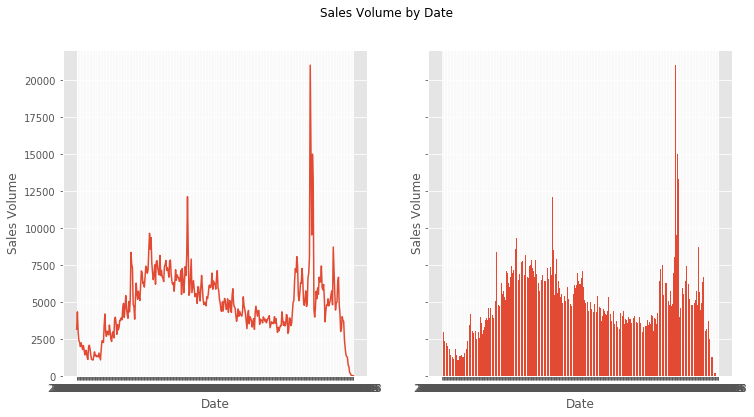

In [198]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Date'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Date')

axs[1].bar(data['Date'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Date')

fig.suptitle('Sales Volume by Date')

In [202]:
index_max = np.argmax(data['Quantity']) # Find date with max Quantity
data.iloc[index_max]

Date        2017-11-11
Quantity         21033
Name: 314, dtype: object

### ● 依月份分群（Month）

    (1) 依月份分群，計算當月總銷售量（Sales Volume = Total Quantity）。

In [180]:
data = df2.groupby(by='Month')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index
data

,Month,Quantity
0,01,57526
1,02,80519
2,03,163329
3,04,219153
4,05,217729
5,06,171542
6,07,166239
7,08,127450
8,09,111033
9,10,147419


    (2) 繪製折線圖（line chart）                          (3) 繪製長條圖（bar chart）

觀察折線圖和直方圖，發現當月總銷售量高峰出現在四、五及十一月。按照前一小題（依日期分群）的結論，十一月的高銷售量極有可能是受 2017年11月11日 單日異常極高值影響，而四、五月的銷售盛況則值得玩味。

Text(0.5,0.98,'Sales Volume by Month')

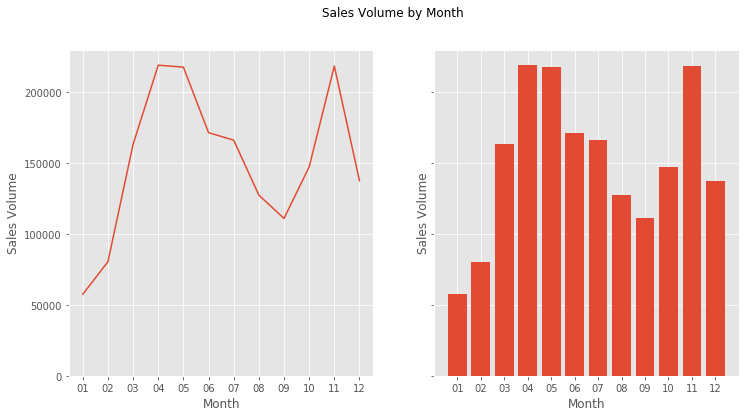

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Month'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Month')

axs[1].bar(data['Month'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Month')

fig.suptitle('Sales Volume by Month')

### ● 依星期分群（Weekday）

    (1) 依星期幾分群，計算星期幾的總銷售量（Sales Volume = Total Quantity）。

In [204]:
data = df2.groupby(by='Weekday')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index so as to sort Weekday
data

,Weekday,Quantity
0,Friday,230919
1,Monday,246891
2,Saturday,262892
3,Sunday,277596
4,Thursday,243930
5,Tuesday,281161
6,Wednesday,274661


In [205]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data.Weekday = pd.Categorical(data.Weekday, 
                      categories=weekday_order,
                      ordered=True)

data.sort_values('Weekday', inplace=True) # sort Weekdays
data

,Weekday,Quantity
1,Monday,246891
5,Tuesday,281161
6,Wednesday,274661
4,Thursday,243930
0,Friday,230919
2,Saturday,262892
3,Sunday,277596


In [206]:
data = data.reset_index(drop=True) # reset index
data

,Weekday,Quantity
0,Monday,246891
1,Tuesday,281161
2,Wednesday,274661
3,Thursday,243930
4,Friday,230919
5,Saturday,262892
6,Sunday,277596


    (2) 繪製折線圖（line chart）                          (3) 繪製長條圖（bar chart）

觀察折線圖和直方圖，發現總銷售量高峰出現在星期二、三及周末。周末購物潮好理解，而星期二、三的總銷售量高峰則有可能和「週三小周末」有關，不少商家常以此作為促銷噱頭以衝高銷售量。

Text(0.5,0.98,'Sales Volume by Weekday')

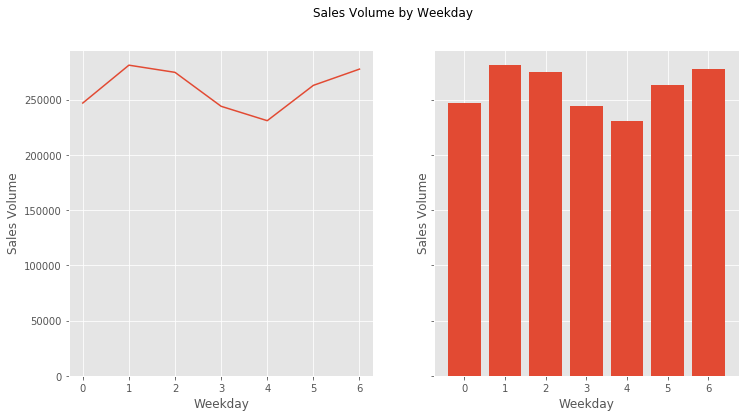

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data.index.values, data['Quantity']) # must use index values as x for categorical data
axs[0].set_xticks(data.index.values, weekday_order) ###為甚麼出不來?!!
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Weekday')

axs[1].bar(data.index.values, data['Quantity']) # must use index values as x for categorical data
axs[1].set_xticks(data.index.values, weekday_order)
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Weekday')

fig.suptitle('Sales Volume by Weekday')

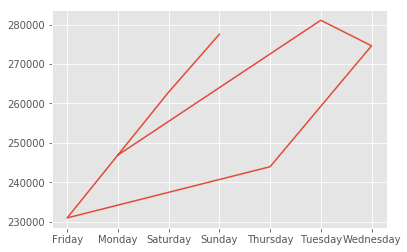

In [146]:
fig, ax = plt.subplots()
ax.plot(data['Weekday'].tolist(), data['Quantity'].tolist())  ### Categorical data 無法這樣 plot!!

### ● 依小時分群（Hour）

    (1) 依小時分群，計算每小時的總銷售量（Sales Volume = Total Quantity）。

In [183]:
data = df2.groupby(by='Hour')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index so as to sort Weekday
data

,Hour,Quantity
0,00,117968
1,01,79443
2,02,48882
3,03,29436
4,04,18835
5,05,15012
6,06,20071
7,07,32724
8,08,48610
9,09,62228


    (2) 繪製折線圖（line chart）                          (3) 繪製長條圖（bar chart）

觀察折線圖和直方圖，發現總銷售量高峰出現在午夜，次高峰的總銷售量約略最高峰的一半，約莫在中午時段，可見不少用戶為夜貓族。

Text(0.5,0.98,'Sales Volume by Hour')

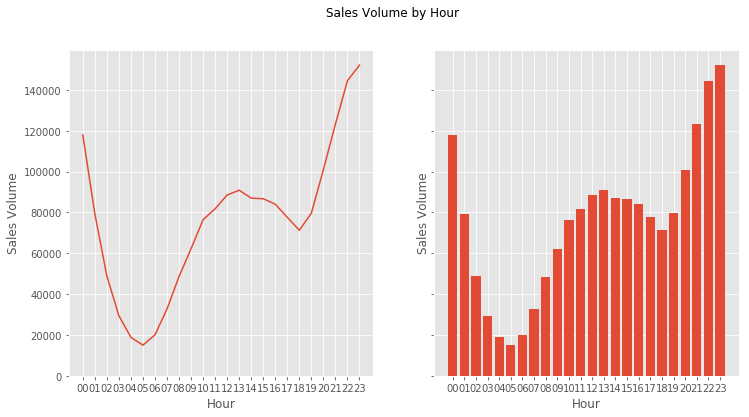

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Hour'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Hour')

axs[1].bar(data['Hour'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Hour')

fig.suptitle('Sales Volume by Hour')